# Bulk RNA seq Exploratory Data Analysis

First, we'll want to import pandas to be able to read in our data and manipulate it. We also need matplotlib for plotting, and seaborn (for prettier plots).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then we'll read in the bulk RNA seq dataset to look at it. `df.head()` will print the first five lines, if you want to quickly view the df. Some other helpful ones are `df.info()` which gives info about each column, and `df.describe()` which will give you statistics on all the columns with numerical values (floats and integer types). 

In [35]:
df = pd.read_csv('../data/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv', header = 0, index_col = 0)

In [36]:
df.head()

,m.DMS153,m.NCIH60,m.NCIH69,m.NCIH82,m.NCIH128,m.NCIH146,m.NCIH187,m.NCIH209,m.NCIH211,m.NCIH250,...,c.NCIH524,c.NCIH526,c.NCIH69,c.NCIH82,c.NCIH841,c.NCIH889,c.SBC5,c.SCLC21H,c.SHP77,c.SW1271
A1BG,2.955199,3.239727,3.599770,3.055231,4.579507,4.685081,3.215947,4.181752,1.288835,4.804468,...,4.183146,3.405942,4.256034,3.905371,4.436237,5.073359,4.423783,3.713345,3.438644,4.209637
A1CF,0.077212,0.167166,0.117398,0.536179,0.088160,0.074992,0.080727,0.079204,0.107217,0.090348,...,-0.057567,0.623162,-0.107734,-0.016782,0.183740,0.242981,0.008349,0.003494,-0.073834,-0.001700
A2M,2.267502,0.122302,0.085891,1.586479,0.064500,0.231189,0.059062,0.072303,0.189474,0.066101,...,-0.038265,-0.006552,0.040540,0.221331,1.276428,0.039852,0.681201,0.032354,1.635919,0.303402
A2ML1,0.011011,-0.007241,-0.005086,-0.004471,-0.003819,0.011107,-0.003497,-0.003431,-0.004644,-0.003914,...,0.003116,0.006167,0.006514,0.017533,0.015672,0.114451,0.043520,0.004658,0.003820,0.031692
A4GALT,2.453512,1.528297,1.428711,0.359365,0.865621,0.867495,2.455182,1.037618,0.265048,3.132071,...,0.569911,1.458448,0.513539,0.191663,3.127982,0.086832,2.641161,0.764500,0.861152,1.868799


**How many cell lines are in the dataset? How many genes?**

In [38]:
### Your answer here ###

## Looking at Notch pathway genes

Let's see which genes from the Notch pathway are in our bulk RNA seq dataset, and plot the expression of each as a boxplot.

In [39]:
Notch_genes = ['DLL1', 'DLL3', 'DLL4', 'JAG1', 'JAG2', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'MAML1', 'RBPJ', 'REST', 'MYC', 'MYCL', 'HES1', 'HES5', 'HES6', 'HEY1', 'HEY2', 'ASCL1', 'NEUROG3', 'NEUROD1']

df = df.loc[Notch_genes] #if there are any missing genes, this line may not work in the future. We are lucky that all of our genes are in this list. If you run into a problem later, you can do the following line:

# df = df.loc[set(df.index).intersection(set(Notch_genes))]

In [40]:
df = df.T #it's easier if genes are columns in python

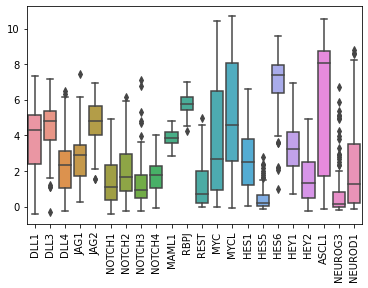

In [41]:
sns.boxplot(data = df)
plt.xticks(rotation= 90)
plt.show()

Try to make a scatterplot of two of the genes from the list above. For example, the SCLC field generally thinks of Notch (arbitrarily any one of the four) as correlating with Hes1. Is this always true?

Also, do the Delta like ligands always inversely correlate with the Notch's?

You can use seaborn's scatterplot function, matplotlib's scatter function, or seaborn's lmplot function, which will give you confidence intervals and a fitted linear model (but sadly doesn't print out the p-val or R for the fit). 

In [ ]:
##### Your code here ####

## Adding subtype information

What we really want to know is if the expression of these genes are different across our subtypes, so we need to read in subtype labels to add them to our plots. Then we can make a boxplot grouped by subtype, or a scatterplot colored by subtype.

In [18]:
subtypes = pd.read_csv('../data/combined_clusters_2020-05-27-MC copy.csv', index_col = 0, header = 0)
subtypes.head()

,source,subtype,NEW_10_2020,10_08_2020
c.COLO668,CCLE,A2,A2,A2
c.CORL24,CCLE,A,N,A
c.CORL279,CCLE,A,A,A
c.CORL311,CCLE,P,P,P
c.CORL47,CCLE,A,A,A


Sorry that this csv is a little messy, but we'll use the column "10_08_2020." The others are old ways of subtyping. The bulk RNA seq dataset we are using combines two datasets, from Cancer Cell Line Encyclopedia (CCLE) and a guy named John Minna (Minna). The cell lines are labeled with c or m accordingly. Can you figure out how many cell lines overlap between the two datasets?

In [22]:
## we'll make a new dataframe to play around with this one, so we don't accidentally overwrite anything.

tmp = subtypes.copy()

There are a few different ways to do this. We can remove the c and m from the index and then compare how many names are the same. This will require us to work with strings, and use the `str.split()` function built into Python. We can split the string into two pieces (using the period) and take the second piece. Then we can compare the strings.

Alternatively, we can compare the strings directly to see how many of them match. We'll use the first method.

In [23]:
tmp.index

Index(['c.COLO668', 'c.CORL24', 'c.CORL279', 'c.CORL311', 'c.CORL47',
       'c.CORL88', 'c.CORL95', 'c.DMS114', 'c.DMS153', 'c.DMS273',
       ...
       'm.NCIH735', 'm.NCIH738', 'm.NCIH740', 'm.NCIH748', 'm.NCIH774',
       'm.NCIH82', 'm.NCIH841', 'm.NCIH865', 'm.NCIH889', 'm.SHP77'],
      dtype='object', length=120)

In [26]:
new_indices = []
for i in tmp.index: #for each cell line in index
    new_index = i.split('.')[1] #i is already a string, so we call the split method, and it splits the string into two pieces around the period. we then take the second piece (the cell line name) using the index 1.
    new_indices.append(new_index)
tmp.index = new_indices #make a new column with these cell line names or rename the index. Be careful with renaming the index, because now some rows will have the same index so if you try to call them you'll get a small dataframe (with two rows) instead of a single row.

We can use `value_counts()` to find out how many of each cell line there are. We see some have more than one-- i.e. one in each dataset. 

In [ ]:
tmp.index.value_counts()

How many are equal to 2?

In [29]:
(tmp.index.value_counts() == 2).sum()

29

Keep in mind that there are 29 cell lines that overlap between the two datasets. We're going to add this info to the old dataframe.

In [43]:
df['subtype'] = ### Your code here-- get the 10_08_2020 column from the subtypes dataframe. ###

We're going to "melt" the dataframe to make it easier for seaborn to use it. Going forward, you can use either `df` or `df_long.` `df_long` will now have one row for each *combination* of cell line and gene name, and a column called "value" for the expression level of that gene.

In [54]:
df_long = df.copy()
df_long['cline'] = df.index
df_long = pd.melt(df_long, id_vars=['cline', 'subtype'], value_vars=df_long.columns[0:-2])

In [69]:
df_long.head()

,cline,subtype,variable,value
0,m.DMS153,A2,DLL1,5.662887
1,m.NCIH60,N,DLL1,0.839773
2,m.NCIH69,A,DLL1,4.943790
3,m.NCIH82,uncl,DLL1,0.707564
4,m.NCIH128,A,DLL1,4.091344


The beginning of this dataframe shows the expression `value` of the `variable` (gene name) DLL1 for each `cline.` Notice the number of rows is much longer than `df.` Since we told pandas that `subtype` is not a variable but an ID for each cell line, it keeps the cell line names and subtypes together, and splits the gene columns into "long-form."

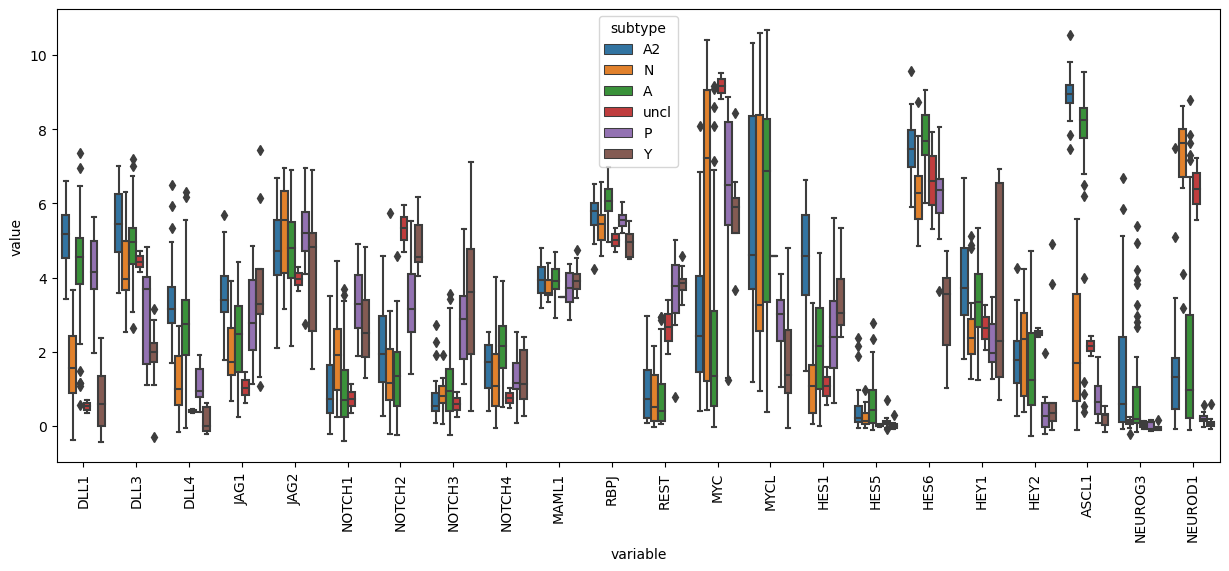

In [68]:
plt.rcParams.update({'figure.dpi': 100})
plt.rcParams.update({'figure.figsize': (15,6)})
sns.boxplot(data = df_long,x = 'variable', y = 'value',hue ='subtype')
plt.xticks(rotation= 90)
plt.show()

We can see a lot of variance between the subtypes for each gene! It's kind of hard to see each gene though. Can you make a boxplot using `df` where `x = 'subtype'` and `y=` the gene of your choice? 

In [70]:
### Your code here ###

Can you make a scatterplot for two of the genes, colored by subtype?

In [ ]:
### Your code here ###

A nice way to view a lot of genes like this is to make a heatmap. Can you make a heatmap using `sns.heatmap` of all the genes versus all the cell lines? (use `df`, not `df_long`)

In [71]:
### Your code here ###

We can also make an `sns.clustermap,` which clusters the rows and or columns to organize the heatmap. Follow the code here to make a clustermap, and try to label the cell line rows by the subtype column in `df`.`

In [ ]:
### Your code here ###